In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
# For CSV
df = pd.read_csv("klar_for_oppgave_5.csv")
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
df_val = pd.read_csv("validation.csv")

In [3]:
# Define the features (PLS components)
X_train = df_train.drop(columns=["Close","Date"])  # Drop the target column

# Define the target (Close price)
y_train = df_train["Close"]

# Define the features (PLS components)
X_val = df_val.drop(columns=["Close","Date"])  # Drop the target column

# Define the target (Close price)
y_val = df_val["Close"]

# Define the features (PLS components)
X_test = df_test.drop(columns=["Close","Date"])  # Drop the target column

# Define the target (Close price)
Y_test = df_test["Close"]


# Implementing Regression

## Why implement regression?
Linear regression is a simple and often used data model. It is efficient in gaining an understanding for how the different predictors, the PLS Components, affect the output variable. 
Linear regression is a ... \textbf{supervised machine-learning algorithm} (source), and maps the data points to the most optimized linear functions. However, as we will soon see, some of the trends from the stock market features are dependent of each others, breaking the condition of multicollinearity. We will therefore look at multiple linear regression first, and lastly compare it to polynomial regression. 
This model also serves as a baseline as an additive model. We will later compare this with other non-linear algorithms to measure performance.

In [4]:
import matplotlib.pyplot as plt

# Define the number of components and number of columns per row
components = [1, 2, 3, 4, 6]  # List of PLS components you want to display
num_cols = 3  # Number of plots per row
num_rows = (len(components) + num_cols - 1) // num_cols  # Calculate the number of rows needed

# Create a figure and subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 12))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot each selected PLS component against Close
for i, comp in enumerate(components):
    axes[i].scatter(df_train[f'PLS_Component_{comp}'], df_train['Close'], alpha=0.5)
    axes[i].set_xlabel(f'PLS_Component_{comp}')
    axes[i].set_ylabel('Close')
    axes[i].set_title(f'PLS_Component_{comp} vs Close')

# Turn off any unused subplots
for j in range(i + 1, num_rows * num_cols):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

AttributeError: module 'numpy' has no attribute 'matrix'

<Figure size 1800x1200 with 6 Axes>

## Simple Linear Regression
From \ref{fig:10} we can see that the data points for Component 1 align in a clear straight line, fulfilling an important assumption for developing a regression algorithm: linearity. This is an essential property that makes it easier and clearer to determine a straight line as close as possible to the data points. When we look at the PLS components in the training data, we can see that some of them have a linear relation to dependant variable. This is specifically true for Component 1, and this the component we will take a closer look on. 
From looking at \ref{fig:11} we can see that the linear regression does not fit the validation data. This is clear because the validation data has a non-linear relationship to the dependant variable. Therefore the assumption of linearity is broken for the simple linear regression. This was to be expected, since there are multiple predictors that decide on. With just one of these components we end up missing out on a lot of crutial data. Therefore will we look closer at multiple linear regression despite this also being linear..


### Stats
Mean Squared Error (MSE): 0.10099674094512495
R-squared (R2): -0.7616619643886113
The Mean Squared Error shows the average difference between the actual and the predicted value. The lower this is, the better. The MSE value is very good - implying either a very accurate algorithm, or something wrong. Heterodasticity is possibly a factor that influenses this. The R-squared value is also very good, where a higher value implies 




## Multiple linear regression
When looking at multiple linear regression we also need to check for multicollinnearity as well as the same values in simple linear regression. Multicollinnearity is when two or more predictors (PLS componentents in our case) have a high corrolation. Idealy we want each compoent to provide unique information, and be orthogonoal with the other components. This is not the case, since many of the PLS_Components have an extreme correlation despite being selected. 

We get that the R-squared value is higher and the MSE value is lower, suggesting that it has a higher accuracy than the simple linear regression. Considering that it captures more of the variance in the dataframe, this makes sense, but we can also see the high correlation for example between PLS_Component_1 and PLS_Component_2, reducing the validicy. 


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df is your dataframe and you've selected the features and target
X = df_train[['PLS_Component_1', 'PLS_Component_2', 'PLS_Component_3', 'PLS_Component_4', 'PLS_Component_6']]
y = df_train['Close']

model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and validation sets
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Calculate performance metrics
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

# Output the performance metrics
print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Training R-squared (R2): {r2_train}")
print(f"Validation Mean Squared Error (MSE): {mse_val}")
print(f"Validation R-squared (R2): {r2_val}")

# Create a figure with two subplots for training and validation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the training data
axes[0].scatter(y_train, y_pred_train, color="blue", alpha=0.5, label="Training data")  # Training data points
axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--", label="Perfect Prediction")  # Diagonal line for perfect prediction
axes[0].set_xlabel("Actual Close")
axes[0].set_ylabel("Predicted Close")
axes[0].set_title("Training Data: Predicted vs Actual Close")
axes[0].legend()

# Plot for the validation data
axes[1].scatter(y_val, y_pred_val, color="blue", alpha=0.5, label="Validation data")  # Validation data points
axes[1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color="red", linestyle="--", label="Perfect Prediction")  # Diagonal line for perfect prediction
axes[1].set_xlabel("Actual Close")
axes[1].set_ylabel("Predicted Close")
axes[1].set_title("Validation Data: Predicted vs Actual Close")
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()

AttributeError: module 'numpy' has no attribute 'matrix'

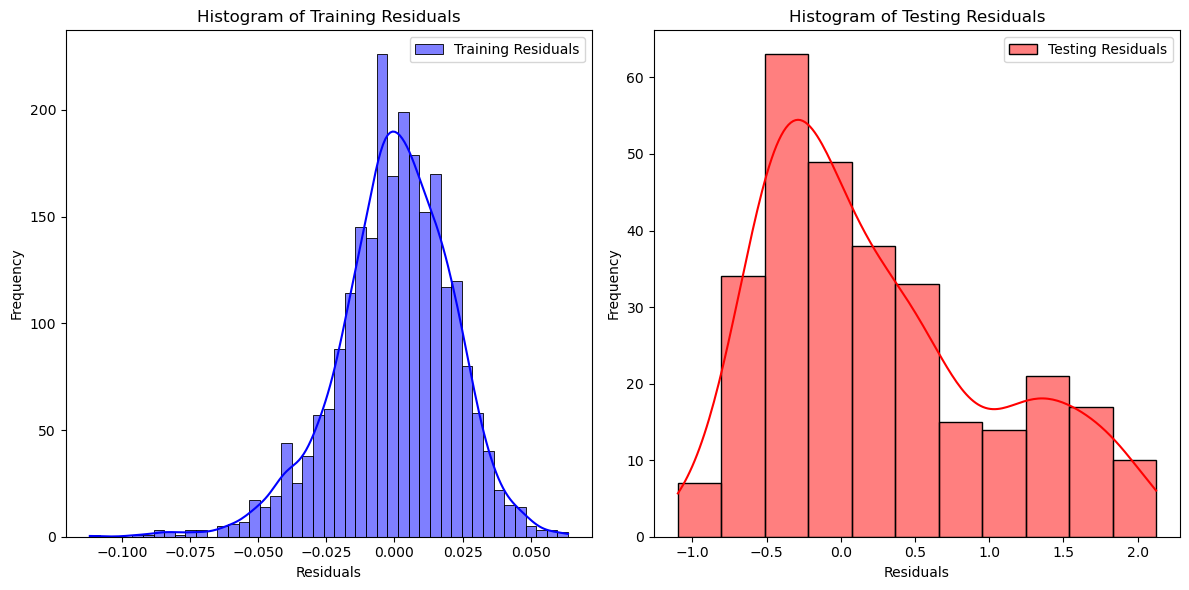

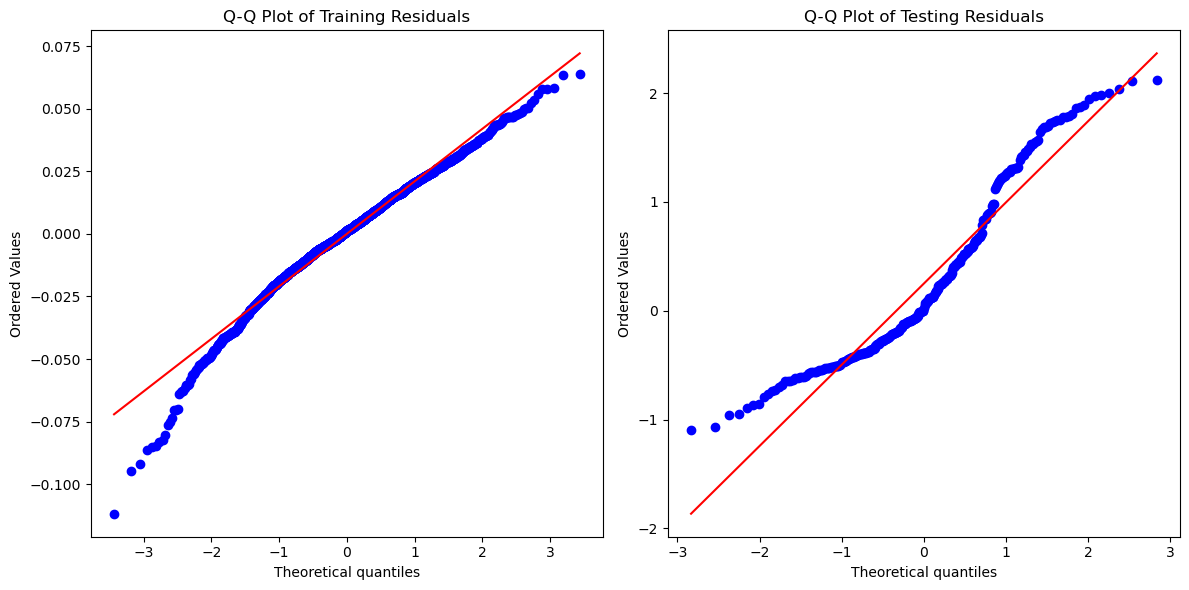

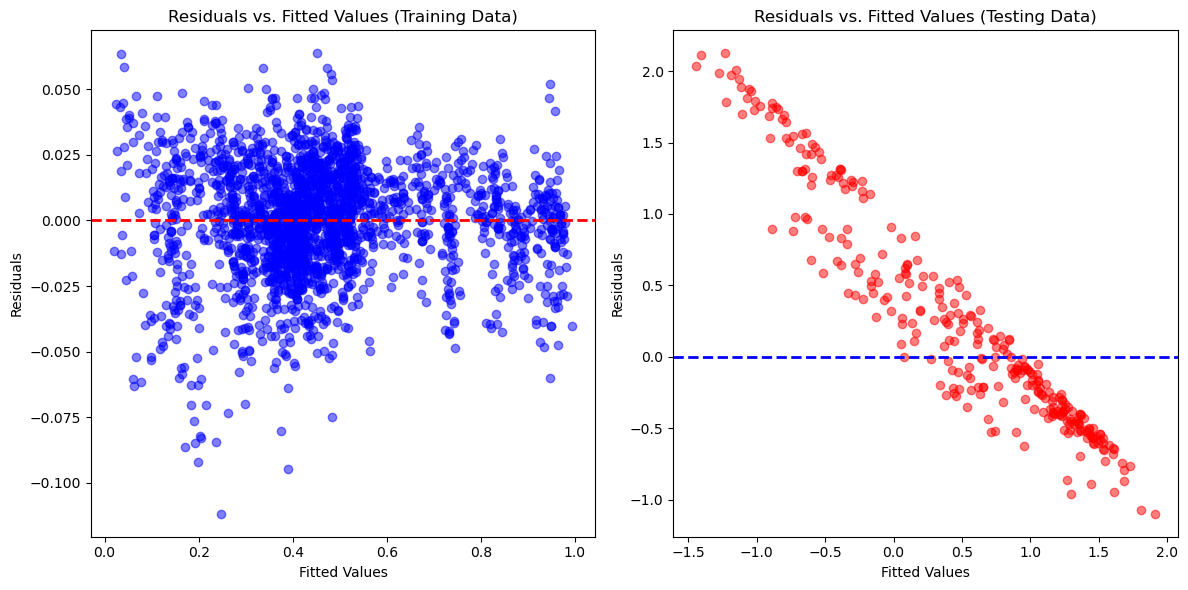

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats  # Import the stats module

model = LinearRegression()
model.fit(X_train, y_train)
## Calculate the fitted values (predictions) for both training and testing sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)

# Calculate residuals for training and testing sets
residuals_train = y_train - y_train_pred
residuals_test = y_val - y_val_pred

# Plot a histogram for both training and testing residuals
plt.figure(figsize=(12, 6))

# Plot training residuals histogram
plt.subplot(1, 2, 1)
sns.histplot(residuals_train, kde=True, color='blue', label='Training Residuals')
plt.title('Histogram of Training Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

# Plot testing residuals histogram
plt.subplot(1, 2, 2)
sns.histplot(residuals_test, kde=True, color='red', label='Testing Residuals')
plt.title('Histogram of Testing Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

# Plot Q-Q plots for both training and testing residuals
plt.figure(figsize=(12, 6))

# Plot training residuals Q-Q plot
plt.subplot(1, 2, 1)
stats.probplot(residuals_train, dist="norm", plot=plt)
plt.title('Q-Q Plot of Training Residuals')

# Plot testing residuals Q-Q plot
plt.subplot(1, 2, 2)
stats.probplot(residuals_test, dist="norm", plot=plt)
plt.title('Q-Q Plot of Testing Residuals')

plt.tight_layout()
plt.show()

# Plot Residuals vs. Fitted Values to check for Homoscedasticity
plt.figure(figsize=(12, 6))

# Residuals vs. Fitted Values for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train_pred, residuals_train, color='blue', alpha=0.5)
plt.axhline(0, color='red', linewidth=2, linestyle='--')  # Horizontal line at zero
plt.title('Residuals vs. Fitted Values (Training Data)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

# Residuals vs. Fitted Values for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_val_pred, residuals_test, color='red', alpha=0.5)
plt.axhline(0, color='blue', linewidth=2, linestyle='--')  # Horizontal line at zero
plt.title('Residuals vs. Fitted Values (Testing Data)')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

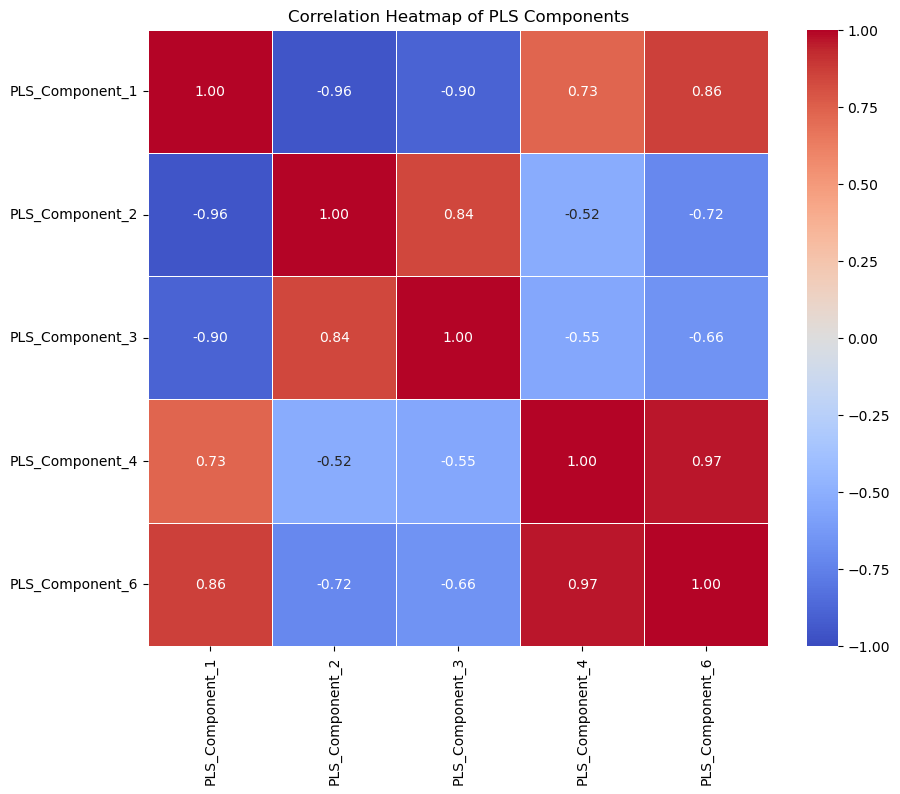

In [ ]:
# Select the PLS components from the dataframe
pls_components = [f'PLS_Component_{comp}' for comp in components]
df_pls = df_train[pls_components]

# Calculate the correlation matrix
corr_matrix = df_pls.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Heatmap of PLS Components')
plt.show()

In [ ]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import matplotlib.pyplot as plt

# # Ensure we're working only with PLS_Component_1
# X_train_single = X_train[["PLS_Component_1"]]
# X_val_single = X_val[["PLS_Component_1"]]

# # Initialize and train the model
# model = LinearRegression()
# model.fit(X_train_single, y_train)

# # Predict on the validation set based on the entire validation dataframe
# y_pred_val = model.predict(X_val_single)

# # Calculate performance metrics
# mse = mean_squared_error(y_val, y_pred_val)
# r2 = r2_score(y_val, y_pred_val)

# # Output the performance metrics
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"R-squared (R2): {r2}")

# # Predict on the training set for plotting
# y_pred_train = model.predict(X_train_single)

# # Create a figure with two subplots
# fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# # Plot for the training data
# axes[0].scatter(X_train_single, y_train, color="blue", alpha=0.5, label="Training data")  # Training data points
# axes[0].plot(X_train_single, y_pred_train, color="red", label="Regression line", linewidth=2)  # Regression line for training
# axes[0].set_xlabel("PLS_Component_1")
# axes[0].set_ylabel("Close")
# axes[0].set_title("Simple Linear Regression: Training Data")
# axes[0].legend()

# # Plot for the validation data (using the prediction on the entire validation df)
# axes[1].scatter(X_val_single, y_val, color="blue", alpha=0.5, label="Validation data")  # Validation data points
# axes[1].plot(X_val_single, y_pred_val, color="red", label="Regression line", linewidth=2)  # Regression line for validation
# axes[1].set_xlabel("PLS_Component_1")
# axes[1].set_ylabel("Close")
# axes[1].set_title("Simple Linear Regression: Validation Data")
# axes[1].legend()

# # Show the plot
# plt.tight_layout()
# plt.show()


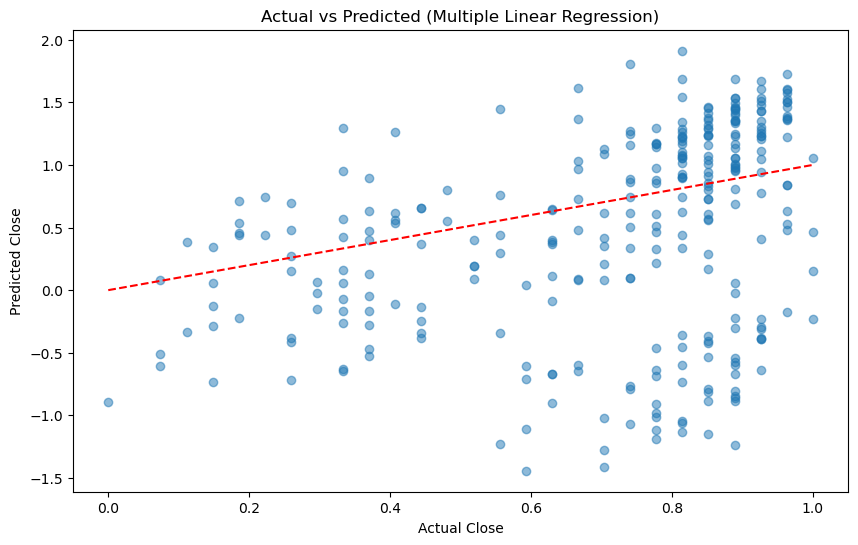

Mean Squared Error (MSE): 0.6527951190886527
R-squared (R2): -10.386548923017733


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_val)

# Plotting the predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.title('Actual vs Predicted (Multiple Linear Regression)')
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()
# Calculate performance metrics
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Output the performance metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

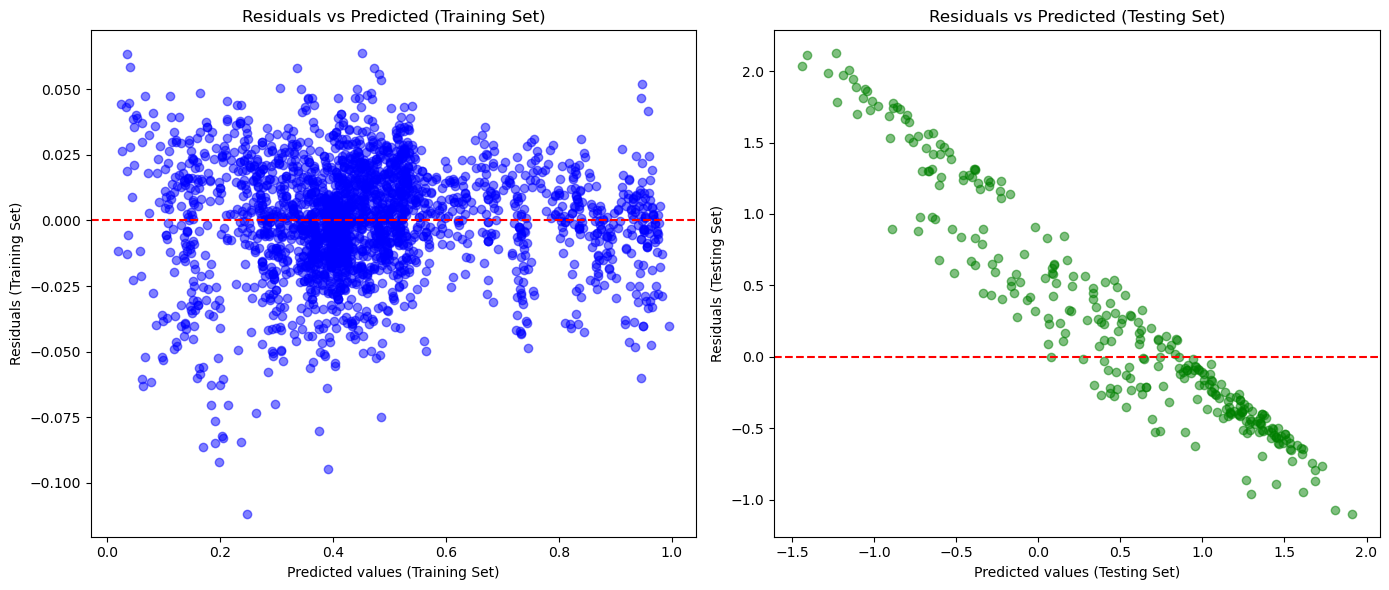

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

# Predict the target values on the test set
y_pred = model.predict(X_val)

# Calculate residuals
residuals = y_val - y_pred

# Optionally, add residuals to the test data for analysis
residuals_df = pd.DataFrame({'Actual': y_val, 'Predicted': y_pred, 'Residuals': residuals})

# Display the residuals
import matplotlib.pyplot as plt
import seaborn as sns

# Predict target values on training set
y_train_pred = model.predict(X_train)

# Calculate residuals for training set
train_residuals = y_train - y_train_pred

# Plot residuals for the training set
plt.figure(figsize=(14, 6))

# Training residuals
plt.subplot(1, 2, 1)  # (rows, columns, position)
plt.scatter(y_train_pred, train_residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Line at y=0
plt.title('Residuals vs Predicted (Training Set)')
plt.xlabel('Predicted values (Training Set)')
plt.ylabel('Residuals (Training Set)')

# Testing residuals
plt.subplot(1, 2, 2)  # (rows, columns, position)
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')  # Line at y=0
plt.title('Residuals vs Predicted (Testing Set)')
plt.xlabel('Predicted values (Testing Set)')
plt.ylabel('Residuals (Testing Set)')

plt.tight_layout()
plt.show()

## Polynomial regression
This form for regression is non-linear, and has the potential to capture some different trends that linear regression will. However 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Define the degree of the polynomial
poly_degree = 2  # You can change this to experiment with different degrees

# Create polynomial features
poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
X_poly = poly.fit_transform(X_train)


# Train the linear model on the polynomial features
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the training and validation sets
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)

# Calculate performance metrics
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

# Output the performance metrics
print(f"Training Mean Squared Error (MSE): {mse_train}")
print(f"Training R-squared (R2): {r2_train}")
print(f"Validation Mean Squared Error (MSE): {mse_val}")
print(f"Validation R-squared (R2): {r2_val}")

# Create a figure with two subplots for training and validation
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot for the training data
axes[0].scatter(y_train, y_pred_train, color="blue", alpha=0.5, label="Training data")
axes[0].plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color="red", linestyle="--", label="Perfect Prediction")
axes[0].set_xlabel("Actual Close")
axes[0].set_ylabel("Predicted Close")
axes[0].set_title("Training Data: Predicted vs Actual Close")
axes[0].legend()

# Plot for the validation data
axes[1].scatter(y_val, y_pred_val, color="blue", alpha=0.5, label="Validation data")
axes[1].plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color="red", linestyle="--", label="Perfect Prediction")
axes[1].set_xlabel("Actual Close")
axes[1].set_ylabel("Predicted Close")
axes[1].set_title("Validation Data: Predicted vs Actual Close")
axes[1].legend()

# Show the plot
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

Now that we know that _____ is the best form for regression on the dataframe, we should check whether it fufills the following conditions:
found here: https://www.geeksforgeeks.org/ml-linear-regression/ 
  for linear regression:
- Linearity
- Independence
- Homoscedasticity
- Normality
  for polynomial regression:
- no multicollinearity
- additivity
- feature selection
- Overfitting